**Introduction**

This problem performs video analytics of an interview canidate for a given video on 4 aspects:


1.   Sentiment Analysis of the Candidate
2.   Trancription of the audio
3.   Facial expression recognition
4.   Non verbal gestures



- Use python to complete the task.
- Use of google collaboratory.
- Use of specialized APIs (Video Indexer from Microsoft Azure and Speech Recognition from Google) and libraries (fer, CV2 and face recognition) to perform the necessary operations.


          1.   Sentiment Analysis of the Candidate - Video Indexer by Microsoft Azure
          2.   Transcribtion - Speech recognition by Google
          3.   Facial expressions - FER Library
          4.   Non verbal Gestures - CV2 and face recognition library



**Installing and Loading libraries**

In [ ]:
!pip install video_indexer
!pip install SpeechRecognition
!pip install fer
#!pip install opencv-python
!pip install face-recognition
#!pip install dlib

In [ ]:
from video_indexer import VideoIndexer
from google.colab import drive
import matplotlib.pyplot as plt
import moviepy.editor as mp 
import os
import speech_recognition as sr
from fer import Video
from fer import FER
import cv2
import pandas as pd
import face_recognition # Runtime->Change runtime type->GPU


**Sentiment Analysis Of the Candidate**

Using VIDEO Indexer from Microsoft Azure

In [ ]:
CONFIG = {
    'SUBSCRIPTION_KEY': '6286729443b4435e94eafa2832043c76',
    'LOCATION': 'trial',
    'ACCOUNT_ID': '35eb8163-a9c3-48ab-8d3c-d9f1412a367b'
}

vi = VideoIndexer(
    vi_subscription_key=CONFIG['SUBSCRIPTION_KEY'],
    vi_location=CONFIG['LOCATION'],
    vi_account_id=CONFIG['ACCOUNT_ID']
)

In [ ]:
drive.mount('/content/drive', force_remount=True)


In [ ]:
!ls '/content/drive/My Drive/AI Australia - Problem'

In [ ]:
video_id = vi.upload_to_video_indexer(
   input_filename='/content/drive/My Drive/AI Australia - Problem/My_video.mp4',
   video_name='My_Video_Indexer',  # identifier for video in Video Indexer platform, must be unique during indexing time
   video_language='English'
)

In [ ]:
info = vi.get_video_info(
    video_id,
    video_language='English'
)

Getting video info for: 5f68852fd8


In [ ]:
num_emotions=len(info['summarizedInsights']['emotions'])

emotions=[]
percentage=[]
for ind,each in enumerate(info['summarizedInsights']['emotions']):
  #print(info['summarizedInsights']['emotions'][ind])
  print(info['summarizedInsights']['emotions'][ind]['type'])
  print(info['summarizedInsights']['emotions'][ind]['seenDurationRatio']*100)
  print("****************------------------**********")
  emotions.append(info['summarizedInsights']['emotions'][ind]['type'])
  percentage.append(info['summarizedInsights']['emotions'][ind]['seenDurationRatio']*100)

In [ ]:
emotions

['Joy', 'Sad']

In [ ]:
percentage

[5.0200000000000005, 3.81]

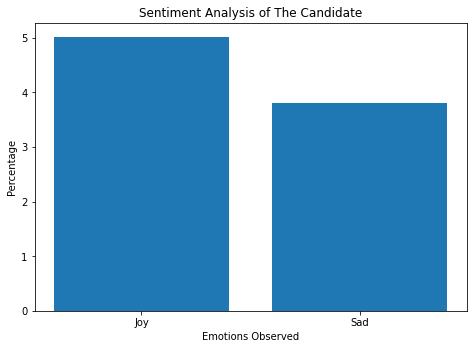

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Percentage')
ax.set_xlabel("Emotions Observed")
ax.set_title('Sentiment Analysis of The Candidate')
ax.bar(emotions,percentage)
plt.show()


In [ ]:
sentiments=[]
percentage1=[]
for ind,each in enumerate(info['summarizedInsights']['sentiments']):
  sentiments.append(info['summarizedInsights']['sentiments'][ind]['sentimentKey'])
  percentage1.append(info['summarizedInsights']['sentiments'][ind]['seenDurationRatio']*100)


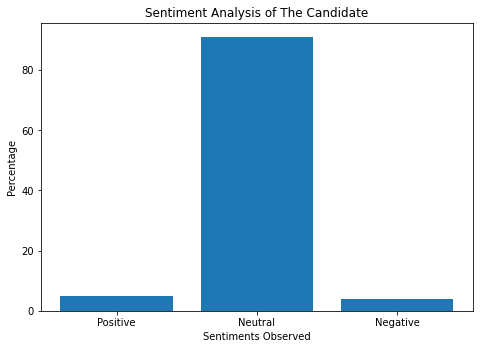

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Percentage')
ax.set_xlabel("Sentiments Observed")
ax.set_title('Sentiment Analysis of The Candidate')
ax.bar(sentiments,percentage1)
plt.show()


As can be seen by the bar chart (also displayed by the video) the video mostly displays neutral and positive response. The corresponding emotions with positive sentiment i.e. Joy and negative seniment i.e. Sad are also displayed by the graph above. 

In [ ]:
info['summarizedInsights'].keys()

dict_keys(['name', 'id', 'privacyMode', 'duration', 'thumbnailVideoId', 'thumbnailId', 'faces', 'keywords', 'sentiments', 'emotions', 'audioEffects', 'labels', 'framePatterns', 'brands', 'namedLocations', 'namedPeople', 'statistics', 'topics'])

In [ ]:
# key words
[info['summarizedInsights']["keywords"][i]["name"] for i in range(len(info['summarizedInsights']["keywords"]))]

['service delivery',
 'recently',
 'experience',
 'projects',
 'team',
 'business',
 'monash',
 'analysis',
 'working',
 'work',
 'australia']

Moreover, common key words were also obtained to get further insights into the sentiments. From, these it can be observed that the words are common words used in the AI field.

**Voice to Text**

Using google speech recognition for transcribing the speech in the video.


In [ ]:
clip = mp.VideoFileClip(r"/content/drive/My Drive/AI Australia - Problem/My_video.mp4") 

In [ ]:
clip.audio.write_audiofile(r"/content/drive/My Drive/AI Australia - Problem/My_video.wav") 

In [ ]:
r = sr.Recognizer()
audio1 = sr.AudioFile(r"/content/drive/My Drive/AI Australia - Problem/My_video.wav")

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12)


In [ ]:
text1=r.recognize_google(audio)
text1

'I do hope you are doing well well so much about myself while I have strong background in software Service delivery I recently. It was designed'

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12,offset=12)

text2=r.recognize_google(audio)
text2

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12,offset=24)

text3=r.recognize_google(audio)
text3

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12,offset=36)

text4=r.recognize_google(audio)
text4

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12,offset=48)

text5=r.recognize_google(audio)
text5

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12,offset=60)

text6=r.recognize_google(audio)
text6

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=12,offset=72)

text7=r.recognize_google(audio)
text7

In [ ]:
with audio1 as source:
  audio = r.record(source,duration=17,offset=84)

text8=r.recognize_google(audio)
text8

In [ ]:
text=text1+" "+text2+" "+text3+" "+text4+" "+text5+" "+text6+" "+text7+" "+text8+"."
text

**Facial Expressions of the video**

Setting up FER library 

In [ ]:
video = Video(r"/content/drive/My Drive/AI Australia - Problem/My_video.mp4")

# Analyze video, displaying the output
detector = FER(mtcnn=True)


Analyzing video frames using MTCNN and saving facial expressions of happy, surprised, sad, angry, fear, disgust and neutral in each frame.

In [ ]:
raw_data = video.analyze(detector)
df = video.to_pandas(raw_data)

Saving the data of frames in a csv file.

In [ ]:
#with open('/content/drive/My Drive/AI Australia - Problem/foo.csv', 'w') as f:
#  df.to_csv(f)
df=pd.read_csv('/content/drive/My Drive/AI Australia - Problem/foo.csv')

Setting a pie chart of average proportions of each facial expression observed in the video.

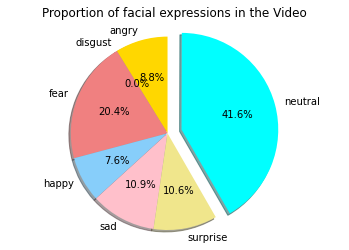

In [ ]:
labels=list(df.columns) 
labels.pop(0)
proportions=[]
for each in labels:
  proportions.append(sum(df[each])/len(df))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink','khaki','cyan']
explode=[0,0,0,0,0,0,0.15]

plt.pie(proportions, labels=labels, colors=colors,autopct='%1.1f%%',explode=explode,shadow=True, startangle=90)
plt.axis('equal')
plt.title("Proportion of facial expressions in the Video")

plt.show()

**Other Non Verbal Attributes**

From the video, it can be seen that other most prominent non verbal attribute is the face/head movement. The below code uses computer visio open source library and the face recognition library to detect movements (between video frames) as Nod, shake, both (Cross mivement) and no movement.

Reading the frames in video using open source library....

In [ ]:
cap= cv2.VideoCapture(r'/content/drive/My Drive/AI Australia - Problem/My_video.mp4')

In [ ]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
total_frames

2988

Detecting shake as movement along the x axis while nod as face movement along the y axis.

In [ ]:
# Setting frame sample rate to be every 10 frames to reduce run time
sample_rate=10
nod=[]
shake=[]
count=0
for fno in range(0, total_frames, sample_rate):
	
  cap.set(cv2.CAP_PROP_POS_FRAMES, fno)
	
  ret,frame = cap.read()
 
  rgb_frame=frame[:,:,::-1]

  #Detecting face location using face recognition library
  face_locations = face_recognition.face_locations(rgb_frame)
  if(len(face_locations)!=0):
    #print(face_locations[0])
    # Using coordinates of the center of the face to detect face movements
    y_center=face_locations[0][0]+((face_locations[0][2]-face_locations[0][0])/2)
    x_center=face_locations[0][3]+((face_locations[0][1]-face_locations[0][3])/2)
    if (count!=0):
      #print("here!!!!")
      if x_center==x_prev:
        shake.append(0)
      else:
        shake.append(1)
      
      if y_center==y_prev:
        nod.append(0)
      else:
        nod.append(1)
      
    x_prev=x_center
    y_prev=y_center
    count+=1
    print(count)


Calculation proportion of movements as nod, shake, cross (both) or no movement.

In [ ]:
count_nod=0
count_shake=0
count_nod_shake=0
count_no=0
for ind,each in enumerate(nod):
  if each==1:
    if shake[ind]==1:
      count_nod_shake+=1
    elif shake[ind]==0:
      count_nod+=1
  elif each==0:
    if shake[ind]==1:
      count_shake+=1
    elif shake[ind]==0:
      count_no+=1
counts=[]
counts.append((count_nod_shake/len(nod))*100)
counts.append((count_nod/len(nod))*100)
counts.append((count_shake/len(nod))*100)
counts.append((count_no/len(nod))*100)

counts

[34.91525423728813, 6.440677966101695, 26.440677966101696, 32.20338983050847]

Plotting bar graph of proportion of movements.

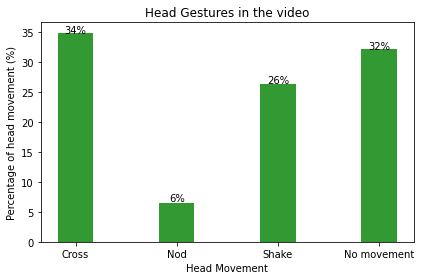

In [ ]:
movement=["Cross","Nod","Shake","No movement"]
fig, ax = plt.subplots()

bar_width = 0.35

rects1 = plt.bar(movement, counts, bar_width, color='g', alpha= 0.8)
plt.xlabel('Head Movement')
plt.ylabel('Percentage of head movement (%)')
plt.title('Head Gestures in the video')
for rect in rects1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

From the results above it can be seen that the results are consistent with what is seen by human eye in the video. Candidate is stable for significant proportion of time in the video which is reprented by good 32% of sample frames not showing any movement. Moreover, candidate moves horizontally while emphasizing which is represented by high percentages in shake and cross head movements. Lastly, the candidate rarely is seen to vertically shake is head which is shown by low percentage in Nod movement.

**Limitations of Analysis**



Due to lack of video data pre trained models from specialized libraries/APIS such as videoindexer (by Microsoft Azure), Speech recognition (by Google) and Facial Expression Recognition (by Justin Shenk) were used. If specialized data of videos were available from interview answers of various candidates, more specific deep neural network models such as CNN could have been trained to obtain more statistically significant results.


**References**

1.   https://pypi.org/project/video-indexer/
2.   https://pypi.org/project/SpeechRecognition/
3.   https://pypi.org/project/fer/

